In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import base64

In [4]:
#df = pd.read_csv ('../Data/Messfahrten/20220921/CSV/Testgelaende/Testgelaende_noise_LC/opendlv.device.gps.pos.Grp1Data-0.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','lat', 'lon', 'speed', 'accel_lon', 'accel_trans', 'accel_down'])
#df.rename(columns = {'timestamp:10881:<lon>':'ts', 'accel_lon:10881:<double>':'accel_lon', 'accel_trans:10881:<double>':'accel_trans', 'accel_down:10881:<double>':'accel_down'}, inplace = True)

df = pd.read_csv ('./thesis_data/data/Vehicle-IMU-Acceleration-10Hz.csv', sep=';', usecols = ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds','IMULatAcceleration', 'IMULgtAcceleration', 'IMUVerAcceleration'])

df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']

In [5]:
# label = pd.read_csv('../Data/Messfahrten/20220921/CSV/Testgelaende/Testgelaende_noise_LC/opendlv.system.LogMessage-999.csv', sep=';', usecols=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds','description'])
# label['ts'] = (label['sampleTimeStamp.seconds']*1000000)+label['sampleTimeStamp.microseconds']
# label['label'] = label['description'].apply(lambda b: str(base64.b64decode(b)))
# #label = label[label['label'].str.contains("round") == True]
# label = label.drop(columns='description')

In [6]:
df['ts'][0]

1584853114144056

In [3]:
# label
df

,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts
0,1584853114,144056,0.3655,0.0085,9.6390,1584853114144056
1,1584853114,244214,0.3060,0.0255,9.6135,1584853114244214
2,1584853114,343862,0.3145,0.0595,9.6390,1584853114343862
3,1584853114,444137,0.3485,0.0935,9.6390,1584853114444137
4,1584853114,544210,0.3995,0.0425,9.6815,1584853114544210
...,...,...,...,...,...,...
33933,1584856523,117558,0.0085,-0.0765,9.6815,1584856523117558
33934,1584856523,217344,-0.0085,-0.0935,9.7155,1584856523217344
33935,1584856523,317244,-0.0255,-0.0765,9.6645,1584856523317244
33936,1584856523,417580,-0.0255,-0.0935,9.6645,1584856523417580


In [8]:
#faktor_multiply = 1000000; offset = 10

#df['lon_mult'] = df.apply(lambda x: int(x['lon']*faktor_multiply) , axis=1)
#df['lat_mult'] = df.apply(lambda x: int(x['lat']*faktor_multiply) , axis=1)

# Don't know what it is
#df.plot(x = 'lon', y = 'lat')

<AxesSubplot: xlabel='ts'>

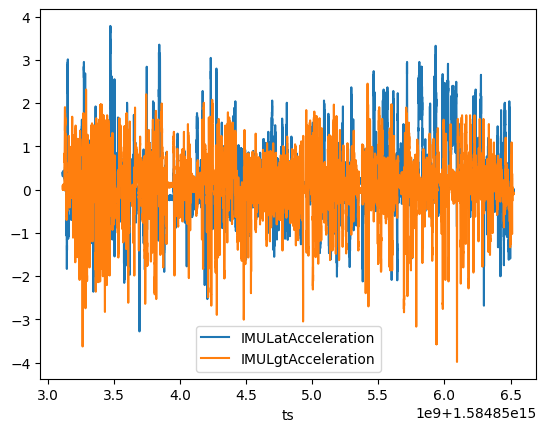

In [9]:
# df.plot(x = 'ts', y = ['accel_lon', 'accel_trans'])
df.plot(x = 'ts', y = ['IMULatAcceleration', 'IMULgtAcceleration'])

In [10]:
# dff = df[(df['ts'] > 1646666562000000) & (df['ts'] < 1646666566000000)]
# dff = df[(df['ts'] > 1646666550000000) & (df['ts'] < 1646666770000000)]
# dff = df[(df['ts'] > 1663764853002227) & (df['ts'] < 1663765093002227)] # lanechange
# dff = df[(df['ts'] > 1663767219379889) & (df['ts'] < 1663767219379889)] # & (df['ts'] < 1663767254379889)]
# dff = df[(df['ts'] > 1663767093379889) & (df['ts'] < 1663767111159889)]

time_stamp = 1663764359981000
dff = df[(df['ts'] > time_stamp + 5500000) & (df['ts'] < time_stamp + 11000000)]


# dff = df[(df['ts'] > 1663767714858000) & (df['ts'] < 1663767814858000)]

#dff = df[(df['accel_lon'] > 140000)]
#dff = df[(df['morton'] > 26776019010)]
#dff = df

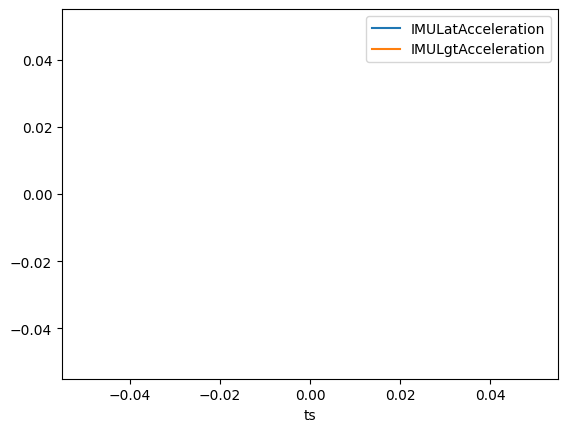

In [12]:
# dff.plot(x = 'lon', y = 'lat')   wat is thiiiiiiiiiiiis
plt.show()
#dff.plot(x = 'ts', y=['accel_lon', 'accel_trans'] )
dff.plot(x = 'ts', y=['IMULatAcceleration', 'IMULgtAcceleration'] )
#for idx, row in label.iterrows():
#    plt.annotate(row['label'], (row['ts'], 2.5), rotation=60)
plt.show()


In [108]:
dff = dff.drop(columns=['ts'])

In [109]:
dff.to_csv(r'../Data/Ausschnitte/Hard_Braking/noise_straight_fast_2.csv', sep=';', index = False)